<a href="https://colab.research.google.com/github/luiscmc10/1820-machine-learning-lidiando-con-datos-de-muchas-dimensiones/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Lidiando con datos de muchas dimensiones

Cuando trabajamos con datos que contienen muchas dimensiones, lo recomendable es tomar dichos datos y transformarlos de modo que se ajusten a un espacio dimensional menor asegurándonos de que el espacio dimensional resultante mantenga las propiedades que mejor caracterizan a los datos originales, garantizando su dimensión intrínseca.


En este notebook, estaremos aprendiendo varias estrategias para lidiar con la alta dimensionalidad en el modelaje de aprendizaje de máquina.


El dataset empleado en el desarrollo de este proyecto es un dataset ficticio, llamado a ```aluracare.csv```, adaptado a nuestro contexto, tomando como referencia el siguiente dataset:  

*Dataset:* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. Datos con muchas dimensiones

##### *https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html*

In [15]:
#Cargar el archivo analizar
import pandas as pd
dataset = pd.read_csv('aluracare.csv')

In [16]:
dataset.head(5)

,id,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,...,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32,examen_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [17]:
#Para validar las dimensiones de la base de datos
dataset.shape

(569, 35)

In [18]:
#Quiero ver dentro de la base de datos cuantos son malignos y benignos
dataset.diagnostico.value_counts()


B    357
M    212
Name: diagnostico, dtype: int64

In [19]:
#Visualizar que datos que estan nulos.
dataset.isna().sum()

id               0
diagnostico      0
examen_1         0
examen_2         0
examen_3         0
examen_4         0
examen_5         0
examen_6         0
examen_7         0
examen_8         0
examen_9         0
examen_10        0
examen_11        0
examen_12        0
examen_13        0
examen_14        0
examen_15        0
examen_16        0
examen_17        0
examen_18        0
examen_19        0
examen_20        0
examen_21        0
examen_22        0
examen_23        0
examen_24        0
examen_25        0
examen_26        0
examen_27        0
examen_28        0
examen_29        0
examen_30        0
examen_31        0
examen_32        0
examen_33      419
dtype: int64

In [20]:
#Podemos evaluar la cantidad de valores que son de la muestra 419/569
419/569


0.7363796133567663

In [21]:
#Eliminar las columnas que no necesitamos para limpiar la base de datos.
#Cambiar los nombres de Maligno y Benigno
dataset.drop(columns=['id','examen_33'], axis=1,inplace=True)
dataset.diagnostico.replace('M',1,inplace=True)
dataset.diagnostico.replace('B',0,inplace=True)
dataset.head()


,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,examen_9,...,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32
0,1,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [23]:
#Vamos a repartir nuestra base de datos en una de entrenamiento y de prueba, pero antes debemos normalizar los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X= dataset.drop(columns='diagnostico',axis=1)
y= dataset.diagnostico
X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std,y,random_state=42, test_size=0.3)



In [24]:
#Voy evaluar mi modelo con Logistic
from sklearn.linear_model import LogisticRegression

logistic =LogisticRegression(C=100, n_jobs=-1)
logistic.fit(X_train,y_train)

LogisticRegression(C=100, n_jobs=-1)

In [26]:
logistic.score(X_test,y_test)

0.9590643274853801

In [28]:
#Para tener una mejor precisión en nuestro modelo cambiamos el valor de C=100 a C=1
logistic =LogisticRegression(C=1, n_jobs=-1)
logistic.fit(X_train,y_train)

LogisticRegression(C=1, n_jobs=-1)

In [29]:
logistic.score(X_test,y_test)

0.9824561403508771

In [30]:
#vamos hacer un modelo de arboles
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier()
forest.fit(X_test,y_test)


RandomForestClassifier()

In [31]:
forest.score(X_test,y_test)

1.0

# 2. Avanzando y explorando los datos

##### *https://seaborn.pydata.org/introduction.html*
*https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html*

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'examen_1'),
  Text(1, 0, 'examen_2'),
  Text(2, 0, 'examen_3'),
  Text(3, 0, 'examen_4'),
  Text(4, 0, 'examen_5'),
  Text(5, 0, 'examen_6'),
  Text(6, 0, 'examen_7'),
  Text(7, 0, 'examen_8'),
  Text(8, 0, 'examen_9'),
  Text(9, 0, 'examen_10'),
  Text(10, 0, 'examen_11'),
  Text(11, 0, 'examen_12'),
  Text(12, 0, 'examen_13'),
  Text(13, 0, 'examen_14'),
  Text(14, 0, 'examen_15'),
  Text(15, 0, 'examen_16'),
  Text(16, 0, 'examen_17'),
  Text(17, 0, 'examen_18'),
  Text(18, 0, 'examen_19'),
  Text(19, 0, 'examen_20'),
  Text(20, 0, 'examen_21'),
  Text(21, 0, 'examen_22'),
  Text(22, 0, 'examen_23'),
  Text(23, 0, 'examen_24'),
  Text(24, 0, 'examen_25'),
  Text(25, 0, 'examen_26'),
  Text(26, 0, 'examen_27'),
  Text(27, 0, 'examen_28'),
  Text(28, 0, 'examen_29'),
  Text(29, 0, 'examen_30

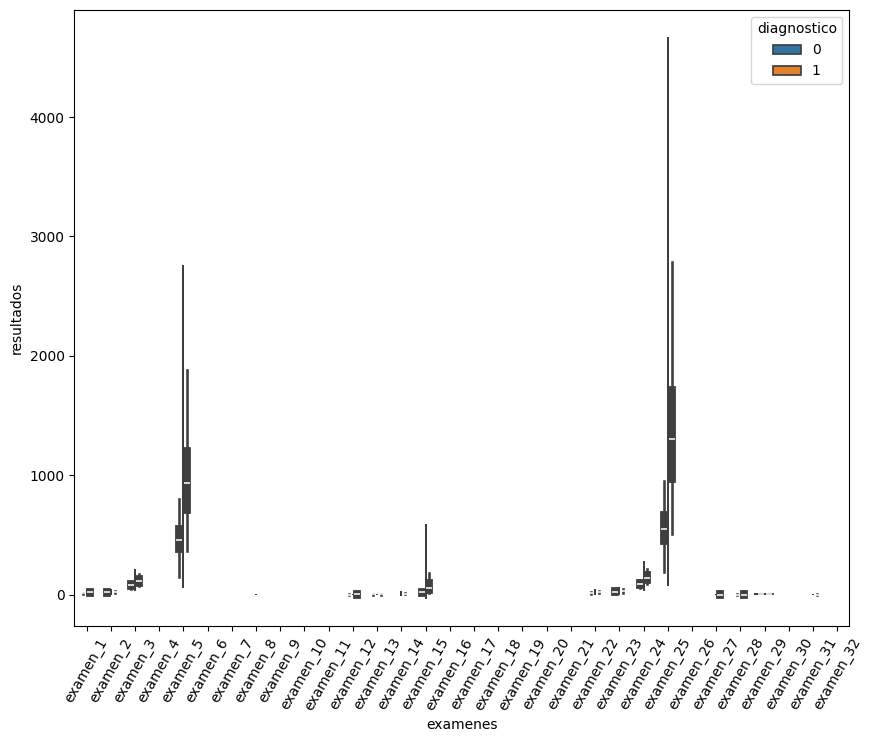

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

datos= pd.concat([y,X],axis=1)
datos=pd.melt(datos,id_vars='diagnostico',var_name='examenes',value_name='resultados')
plt.figure(figsize=(10,8))
sns.violinplot(data=datos,x='examenes',y='resultados',hue='diagnostico',split=True)
plt.xticks(rotation=60)

In [40]:
#Crear una variable con Dataframe
X1 = pd.DataFrame(X_std, columns= x.keys())
X1.head()

,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,...,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


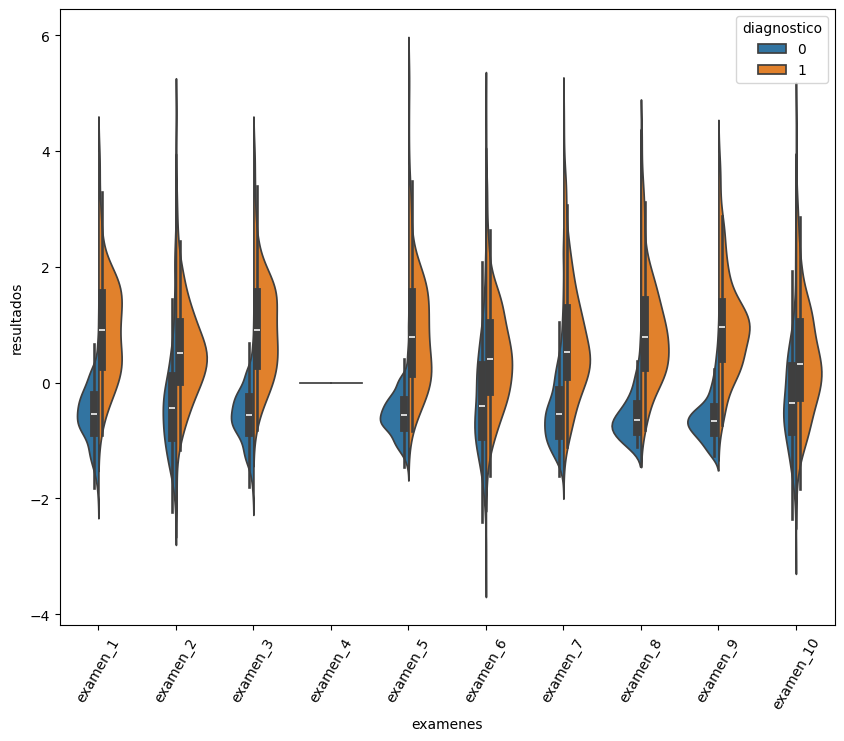

In [42]:
def violin(inicio,fin):
  datos= pd.concat([y,X1.iloc[:,inicio:fin]],axis=1)
  datos=pd.melt(datos,id_vars='diagnostico',var_name='examenes',value_name='resultados')
  plt.figure(figsize=(10,8))
  sns.violinplot(data=datos,x='examenes',y='resultados',hue='diagnostico',split=True)
  plt.xticks(rotation=60)

violin(0,10)

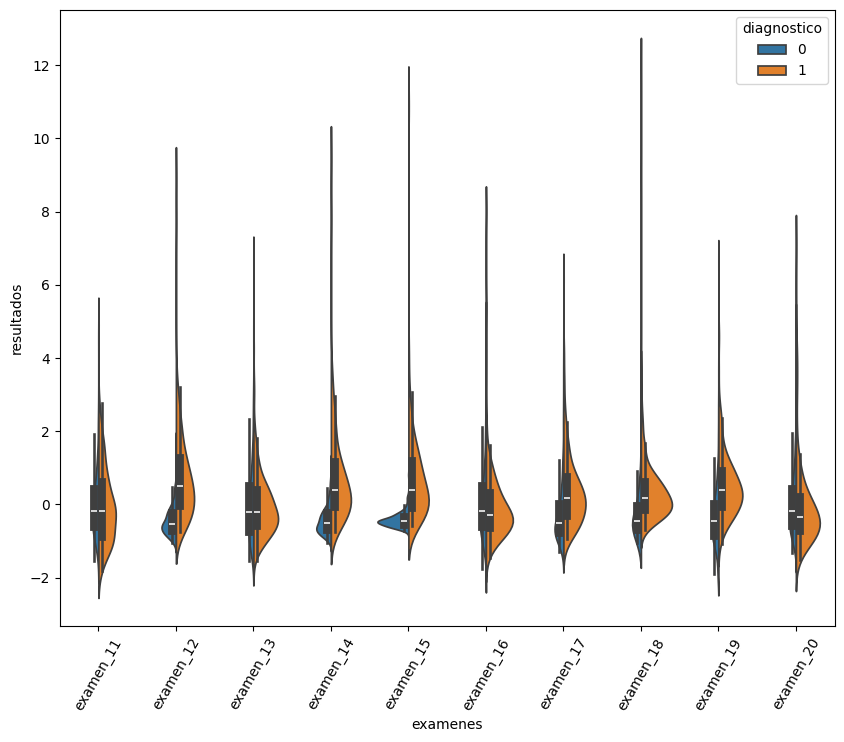

In [43]:
violin(10,20)

# 3. Datos correlacionados

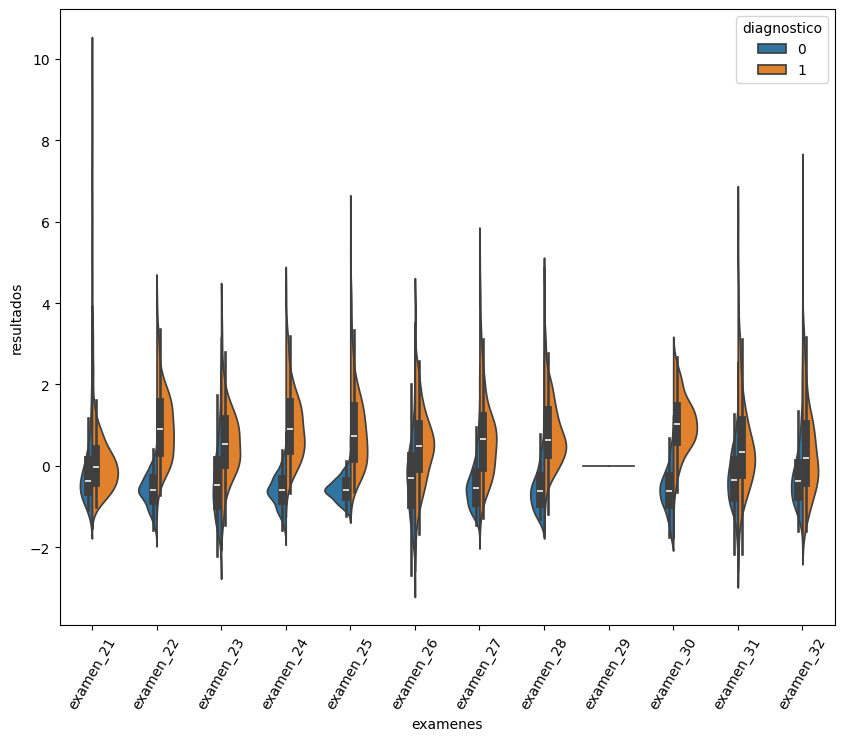

In [44]:
violin(20,32)

In [45]:
# Debo sacar las columna de examen 4 y 29 por que no representan ningun aporte a mi base de datos si observamos los graficos podemos ver que solo sale una línea y no un violin.
X2 = X1.drop(columns=['examen_4','examen_29'],axis=1)

In [46]:
X2.head(2)

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,...,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [51]:
def puntaje(resultados):
  X_train, X_test, y_train, y_test = train_test_split(X_std,y,random_state=42, test_size=0.3)
  logistic = LogisticRegression(C=1,n_jobs=-1)
  logistic.fit(X_train,y_train)
  return f'La exactitud es: {round(logistic.score(X_test,y_test)*100,2)}%'

print(puntaje(X1))

La exactitud es: 98.25%


In [52]:
print(puntaje(X2))

La exactitud es: 98.25%


# 4. Automatizando la selección de los datos

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html*

# 5. Visualizando los datos en el plano

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html*